# Проект e-commerce: вариант 1 

Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может 
быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким 
retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй
RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: 
    R - время от последней покупки пользователя до текущей даты, 
    F - суммарное количество покупок у пользователя за всё время,
    M - сумма покупок за всё время. 
Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary 
для интерпретации этих кластеров. Пример такого описания: 
RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, 
frequency от 2 до 5 заказов в неделю, 
monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from datetime import timedelta
from operator import attrgetter

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
customers = pd.read_csv('../olist_customers_dataset.csv')
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [3]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [4]:
orders = pd.read_csv('../olist_orders_dataset.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [5]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [6]:
order_items = pd.read_csv('../olist_order_items_dataset.csv')
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

# 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

# Определимся с покупками:

olist_orders_dataset.csv —  таблица заказов                                                              
order_id —  уникальный идентификатор заказа (номер чека)  
customer_id —  позаказный идентификатор пользователя  
order_status —  статус заказа  
order_purchase_timestamp —  время создания заказа  
order_approved_at —  время подтверждения оплаты заказа  
order_delivered_carrier_date —  время передачи заказа в логистическую службу  
order_delivered_customer_date —  время доставки заказа  
order_estimated_delivery_date —  обещанная дата доставки  

Уникальные статусы заказов в таблице olist_orders_dataset:  
created —  создан  
approved —  подтверждён  
invoiced —  выставлен счёт  
processing —  в процессе сборки заказа  
shipped —  отгружен со склада  
delivered —  доставлен пользователю   
unavailable —  недоступен  
canceled —  отменён  

created, approved, invoiced, processing, shipped, delivered - можно считать за покупку (или в перспективе), 
unavailable, canceled - не покупка  

тогда для покупок исключаем эти значения unavailable, canceled и order_approved_at.

In [8]:
orders.order_approved_at.isna().sum() # отсутствует факт оплаты

160

In [9]:
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)

In [10]:
orders[orders.order_approved_at.isna()].order_status.value_counts() # посмотрим на них по статусам, может часть оставим

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

canceled     141 - заказ отменен - точно не покупка  
delivered     14 - заказ доставлен пользователю, но еще не оплачен - пока еще не покупка   
created        5 - заказ создан, но еще не оплачен - пока еще не покупка

Покупкой будем считать order_approved_at не NaN, статус заказа не unavailable, canceled.

---------------------------------------------------------------------------

надо определить количество customer_unique_id с одной покупкой, для этого соединим данные и сгруппируем как нам надо

In [11]:
customers_buy = customers.merge(orders, on='customer_id')
customers_buy

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [12]:
customers_buy[(customers_buy.order_status != 'canceled') & 
              (customers_buy.order_status != 'unavailable') &
             (customers_buy.order_approved_at.notna())] \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id': 'count'}) \
    .query('order_id == 1')     

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94968,fffcf5a5ff07b0908bd4e2dbc735a684,1
94969,fffea47cd6d3cc0a88bd621562a9d061,1
94970,ffff371b4d645b6ecea244b27531430a,1
94971,ffff5962728ec6157033ef9805bacc48,1


92087  пользователей совершили покупку только один раз.

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

У нас есть такие данные:   
    
Уникальные статусы заказов в таблице olist_orders_dataset:  
    created —  создан  
    approved —  подтверждён  
    invoiced —  выставлен счёт  
    processing —  в процессе сборки заказа  
    shipped —  отгружен со склада  
    delivered —  доставлен пользователю   
    unavailable —  недоступен  
    canceled —  отменён  
    
created - еще доставится, approved - еще доставится, invoiced - еще доставится, processing - еще доставится,   
shipped - еще доставится, delivered - доставлен, unavailable - не доставляется, canceled - не доставляется  

тогда для анализа оставляем unavailable и canceled.  



olist_orders_dataset.csv —  таблица заказов  
order_id —  уникальный идентификатор заказа (номер чека)  
customer_id —  позаказный идентификатор пользователя  
order_status —  статус заказа  
order_purchase_timestamp —  время создания заказа  
order_approved_at —  время подтверждения оплаты заказа  
order_delivered_carrier_date —  время передачи заказа в логистическую службу  
order_delivered_customer_date —  время доставки заказа  
order_estimated_delivery_date —  обещанная дата доставки  

если отсутствует order_delivered_customer_date —  время доставки заказа, то не доставляется.  

In [13]:
orders.order_delivered_customer_date.isna().sum()

2965

In [14]:
orders[orders.order_delivered_customer_date.isna()].order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

для анализа оставляем canceled, unavailable и delivered (наверное ошибка, заказ доставлен, а даты нет)

In [15]:
orders_not_delivered = orders[((orders.order_status == 'canceled') & (orders.order_delivered_customer_date.isna())) |
                              ((orders.order_status == 'unavailable') & (orders.order_delivered_customer_date.isna())) |
                              ((orders.order_status == 'delivered') & (orders.order_delivered_customer_date.isna()))]
orders_not_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaN,NaN,2018-10-01 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


преобразуем время и узнаем среднее значение в месяц

In [16]:
orders_not_delivered.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [17]:
orders_not_delivered['order_purchase_timestamp'] = pd.to_datetime(orders_not_delivered['order_purchase_timestamp'])

In [18]:
orders_not_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaN,NaN,2018-10-01 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [19]:
orders_not_delivered \
    .query("order_status == 'canceled'") \
    .set_index('order_purchase_timestamp') \
    .resample(rule='M') \
    .order_id.count().mean()  #  среднее для canceled без даты

23.807692307692307

In [20]:
orders_not_delivered \
    .query("order_status == 'unavailable'") \
    .set_index('order_purchase_timestamp') \
    .resample(rule='M') \
    .order_id.count().mean()  #  среднее для unavailable без даты

26.47826086956522

In [21]:
orders_not_delivered \
    .query("order_status == 'delivered'") \
    .set_index('order_purchase_timestamp') \
    .resample(rule='M') \
    .order_id.count().mean()  #  среднее для delivered без даты

0.5333333333333333

другой способ, когда считаем среднее по месяцам без учета нулевых месяцев

In [22]:
# подробно посмотрим на order_status == 'delivered', с отсальными по аналогии
# когда считаем через resample количество месяцев равно 15, учитываем и нулевые месяцы
orders_not_delivered \
    .query("order_status == 'delivered'") \
    .set_index('order_purchase_timestamp') \
    .resample(rule='M') \
    .order_id.count().shape[0]

15

In [23]:
orders_not_delivered \
    .query("order_status == 'delivered'") \
    .set_index('order_purchase_timestamp') \
    .resample(rule='M') \
    .order_id.count()

order_purchase_timestamp
2017-05-31    1
2017-06-30    0
2017-07-31    0
2017-08-31    0
2017-09-30    0
2017-10-31    0
2017-11-30    1
2017-12-31    0
2018-01-31    0
2018-02-28    0
2018-03-31    0
2018-04-30    0
2018-05-31    0
2018-06-30    3
2018-07-31    3
Freq: M, Name: order_id, dtype: int64

In [24]:
# общее количество равно 8
orders_not_delivered.order_status.value_counts()

canceled       619
unavailable    609
delivered        8
Name: order_status, dtype: int64

тогда среднее равно 0.5333333333333333

если считать через группировку по месяцам, то количество месяцев равно 4

In [25]:
orders_not_delivered.order_purchase_timestamp = orders_not_delivered.order_purchase_timestamp.dt.to_period('M')

In [26]:
orders_not_delivered \
    .groupby(['order_purchase_timestamp', 'order_status'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .groupby('order_status', as_index=False) \
    .agg({'order_id': 'count'})

,order_status,order_id
0,canceled,24
1,delivered,4
2,unavailable,21


общее количество не меняется, но меняется среднее

In [27]:
orders_not_delivered \
    .groupby(['order_purchase_timestamp', 'order_status'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .groupby('order_status', as_index=False) \
    .agg({'order_id': 'mean'})

,order_status,order_id
0,canceled,25.791667
1,delivered,2.000000
2,unavailable,29.000000


если брать точную формулировку из задания "Сколько заказов в месяц в среднем" (вероятнее всего здесь имеется 
ввиду все месяцы), то берем результаты первого способа, однако второй способ тоже имеет место быть, когда мы 
не учитываем в расчеты нулевые месяцы

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

соединим таблицы заказов и товаров, преобразуем время создания в дни недели

In [28]:
orders_items = orders.merge(order_items , on='order_id')
orders_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [29]:
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)

In [30]:
orders_items['day_of_week'] = orders_items.order_approved_at.dt.day_name()
orders_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,Tuesday
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,Sunday
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday


сгруппируем и найдем самый частый день

In [31]:
orders_items \
    .groupby('product_id', as_index=False) \
    .agg({'day_of_week': pd.Series.mode})

,product_id,day_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Friday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,"[Monday, Saturday]"
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday
32948,fff9553ac224cec9d15d49f5a263411f,Saturday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

преобразуем время 

In [32]:
orders['date_y_m'] = orders.order_purchase_timestamp.dt.to_period('M')

In [33]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_y_m
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01


In [34]:
customers_orders = customers.merge(orders, on='customer_id')
customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_y_m
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,2018-04
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,2018-04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,2017-11


сгруппируем по году и месяцу и уникальным покупателям

In [35]:
order_in_month = customers_orders[(customers_orders.order_status != 'canceled') & 
                                  (customers_orders.order_status != 'unavailable') &
                                 (customers_orders.order_approved_at.notna())] \
    .groupby(['date_y_m', 'customer_unique_id'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'order_month'})
order_in_month

,date_y_m,customer_unique_id,order_month
0,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,1
1,2016-09,b7d76e111c89f7ebf14761390f0f7d17,1
2,2016-10,0032c76b20340da25249092a268ce66c,1
3,2016-10,01f156677184504063bd19739f924af1,1
4,2016-10,0313291a6f4f16df04dcf819d88c38ef,1
...,...,...,...
96845,2018-08,ffc4e1cd8aa220763480d0a18157c45d,1
96846,2018-08,ffe204b1bb8026741b839085b2fd10f2,1
96847,2018-08,ffec490ab531184a483efe2eedd68908,1
96848,2018-08,fff96bc586f78b1f070da28c4977e810,1


подсчитаем недели и найдем покупки по месяцам

In [36]:
order_in_month['weeks'] = order_in_month.date_y_m.dt.daysinmonth / 7

In [37]:
order_in_month

,date_y_m,customer_unique_id,order_month,weeks
0,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,1,4.285714
1,2016-09,b7d76e111c89f7ebf14761390f0f7d17,1,4.285714
2,2016-10,0032c76b20340da25249092a268ce66c,1,4.428571
3,2016-10,01f156677184504063bd19739f924af1,1,4.428571
4,2016-10,0313291a6f4f16df04dcf819d88c38ef,1,4.428571
...,...,...,...,...
96845,2018-08,ffc4e1cd8aa220763480d0a18157c45d,1,4.428571
96846,2018-08,ffe204b1bb8026741b839085b2fd10f2,1,4.428571
96847,2018-08,ffec490ab531184a483efe2eedd68908,1,4.428571
96848,2018-08,fff96bc586f78b1f070da28c4977e810,1,4.428571


In [38]:
order_in_month['order_in_week'] = order_in_month.order_month / order_in_month.weeks

In [39]:
order_in_month[['customer_unique_id', 'order_in_week']]

,customer_unique_id,order_in_week
0,830d5b7aaa3b6f1e9ad63703bec97d23,0.233333
1,b7d76e111c89f7ebf14761390f0f7d17,0.233333
2,0032c76b20340da25249092a268ce66c,0.225806
3,01f156677184504063bd19739f924af1,0.225806
4,0313291a6f4f16df04dcf819d88c38ef,0.225806
...,...,...
96845,ffc4e1cd8aa220763480d0a18157c45d,0.225806
96846,ffe204b1bb8026741b839085b2fd10f2,0.225806
96847,ffec490ab531184a483efe2eedd68908,0.225806
96848,fff96bc586f78b1f070da28c4977e810,0.225806


# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. (10 баллов)

In [40]:
customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_y_m
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,2018-04
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,2018-04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,2017-11


создадим колонку с датой заказа и первой покупкой

In [41]:
customers_orders['month_buy'] = customers_orders.order_approved_at.dt.to_period('M')

In [42]:
customers_orders['first_buy'] = customers_orders.groupby('customer_unique_id')['order_approved_at'] \
    .transform('min').dt.to_period('M')

In [43]:
customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_y_m,month_buy,first_buy
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05,2018-05,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07,2018-07,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,2018-04,2018-04,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,2018-04,2018-04,2018-04
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,2018-04,2018-04,2018-04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,2017-11,2017-11,2017-11


сгруппируем по покупкам

In [44]:
cohort = customers_orders \
    .groupby(['first_buy', 'month_buy'], as_index=False) \
    .agg({'customer_id': 'nunique'}) \
    .rename(columns={'customer_id': 'count_customers'})
cohort

,first_buy,month_buy,count_customers
0,2016-09,2016-09,1
1,2016-10,2016-10,320
2,2016-10,2017-04,1
3,2016-10,2017-07,1
4,2016-10,2017-09,1
...,...,...,...
215,2018-06,2018-08,17
216,2018-07,2018-07,6022
217,2018-07,2018-08,30
218,2018-08,2018-08,6437


найдем время между покупками

In [45]:
cohort['diff_buy'] = (cohort.month_buy - cohort.first_buy).apply(attrgetter('n'))

In [46]:
cohort

,first_buy,month_buy,count_customers,diff_buy
0,2016-09,2016-09,1,0
1,2016-10,2016-10,320,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11
...,...,...,...,...
215,2018-06,2018-08,17,2
216,2018-07,2018-07,6022,0
217,2018-07,2018-08,30,1
218,2018-08,2018-08,6437,0


In [47]:
cohort_pivot = cohort.pivot_table(index='first_buy', columns='diff_buy', values='count_customers') # развернем
cohort_pivot

diff_buy,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_buy,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,320.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,759.0,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,2.0,2.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1761.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,5.0,NaN,NaN
2017-03,2683.0,14.0,9.0,11.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2354.0,15.0,6.0,5.0,7.0,6.0,9.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,6.0,NaN,NaN,NaN
2017-05,3663.0,20.0,21.0,14.0,11.0,15.0,17.0,6.0,9.0,13.0,10.0,12.0,8.0,2.0,8.0,11.0,NaN,NaN,NaN,NaN
2017-06,3207.0,15.0,12.0,13.0,8.0,11.0,12.0,7.0,4.0,7.0,10.0,12.0,5.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN


In [48]:
cohort_null = cohort_pivot.iloc[:,0] # пользователи в нулевой период

In [49]:
# получаем %
retention = cohort_pivot.div(cohort_null, axis=0)
retention

diff_buy,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_buy,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003125,NaN,NaN,0.003125,NaN,0.003125,NaN,0.003125,NaN,0.003125,NaN,0.003125,0.006250,0.00625
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.005270,0.002635,0.001318,0.003953,0.001318,0.005270,0.001318,0.001318,NaN,0.002635,0.002635,0.007905,0.003953,0.001318,0.001318,0.002635,0.003953,0.001318,NaN
2017-02,1.0,0.002271,0.002271,0.001704,0.003975,0.001136,0.002271,0.001704,0.001136,0.002271,0.001136,0.002839,0.001704,0.001704,0.001136,0.000568,0.000568,0.002839,NaN,NaN
2017-03,1.0,0.005218,0.003354,0.004100,0.003354,0.001491,0.001491,0.002982,0.002982,0.001118,0.003727,0.001491,0.002236,0.001118,0.001491,0.002236,0.000745,0.001491,NaN,NaN
2017-04,1.0,0.006372,0.002549,0.002124,0.002974,0.002549,0.003823,0.002549,0.003398,0.001699,0.002124,0.000850,0.000850,0.000425,0.000850,0.000850,0.002549,NaN,NaN,NaN
2017-05,1.0,0.005460,0.005733,0.003822,0.003003,0.004095,0.004641,0.001638,0.002457,0.003549,0.002730,0.003276,0.002184,0.000546,0.002184,0.003003,NaN,NaN,NaN,NaN
2017-06,1.0,0.004677,0.003742,0.004054,0.002495,0.003430,0.003742,0.002183,0.001247,0.002183,0.003118,0.003742,0.001559,0.001247,0.002183,NaN,NaN,NaN,NaN,NaN


In [50]:
# преобразуем вид
ur_style = (retention
            .style 
            .set_caption('Customer retention')            # добавляем подпись 
            .background_gradient(cmap='viridis')          # раскрашиваем ячейки по столбцам 
            .highlight_null('white')                      # делаем белый фон для значений NaN 
            .format("{:.2%}", na_rep=""))                 # числа форматируем как проценты, NaN заменяем на пустоту 
ur_style

diff_buy,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_buy,,,,,,,,,,,,,,,,,,,,
2016-09,100.00%,,,,,,,,,,,,,,,,,,,
2016-10,100.00%,,,,,,0.31%,,,0.31%,,0.31%,,0.31%,,0.31%,,0.31%,0.62%,0.62%
2016-12,100.00%,100.00%,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.53%,0.26%,0.13%,0.40%,0.13%,0.53%,0.13%,0.13%,,0.26%,0.26%,0.79%,0.40%,0.13%,0.13%,0.26%,0.40%,0.13%,
2017-02,100.00%,0.23%,0.23%,0.17%,0.40%,0.11%,0.23%,0.17%,0.11%,0.23%,0.11%,0.28%,0.17%,0.17%,0.11%,0.06%,0.06%,0.28%,,
2017-03,100.00%,0.52%,0.34%,0.41%,0.34%,0.15%,0.15%,0.30%,0.30%,0.11%,0.37%,0.15%,0.22%,0.11%,0.15%,0.22%,0.07%,0.15%,,
2017-04,100.00%,0.64%,0.25%,0.21%,0.30%,0.25%,0.38%,0.25%,0.34%,0.17%,0.21%,0.08%,0.08%,0.04%,0.08%,0.08%,0.25%,,,
2017-05,100.00%,0.55%,0.57%,0.38%,0.30%,0.41%,0.46%,0.16%,0.25%,0.35%,0.27%,0.33%,0.22%,0.05%,0.22%,0.30%,,,,
2017-06,100.00%,0.47%,0.37%,0.41%,0.25%,0.34%,0.37%,0.22%,0.12%,0.22%,0.31%,0.37%,0.16%,0.12%,0.22%,,,,,


In [51]:
'2017-09'

'2017-09'

# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 

В кластеризации можешь выбрать следующие метрики: 
R - время от последней покупки пользователя до текущей даты, 
F - суммарное количество покупок у пользователя за всё время,
M - сумма покупок за всё время. 

Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary 
для интерпретации этих кластеров. Пример такого описания: 
RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, 
frequency от 2 до 5 заказов в неделю, 
monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

соединим датафрейм заказов и датафрейм с покупками и оставим данные для метрик

In [52]:
for_rfm = customers_buy[(customers_buy.order_status != 'canceled') & 
              (customers_buy.order_status != 'unavailable') &
             (customers_buy.order_approved_at.notna())] \
    .merge(order_items, on='order_id') 
for_rfm = for_rfm[['customer_id', 'customer_unique_id', 'order_approved_at', 'price']]
for_rfm

,customer_id,customer_unique_id,order_approved_at,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,230.00
...,...,...,...,...
112081,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 16:08:45,74.90
112082,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:35:12,114.90
112083,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:30:03,37.00
112084,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:31:20,689.00


В кластеризации следующие метрики:   
R - время от последней покупки пользователя до текущей даты,   
F - суммарное количество покупок у пользователя за всё время,   
M - сумма покупок за всё время.

In [53]:
print('Orders from {} to {}'.format(for_rfm['order_approved_at'].min(),for_rfm['order_approved_at'].max()))

Orders from 2016-09-15 12:16:38 to 2018-09-03 17:40:06


In [54]:
NOW = datetime.datetime.today()
NOW # реальный NOW

datetime.datetime(2023, 1, 14, 9, 52, 12, 413475)

In [55]:
# поменяем NOW_1, как-будто мы анализируем в день после последней покупки
NOW_1 = for_rfm.order_approved_at.max()

In [56]:
for_rfm['for_r'] = for_rfm.order_approved_at.apply(lambda x: (NOW_1 - x).days)
for_rfm

,customer_id,customer_unique_id,order_approved_at,price,for_r
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,124.99,475
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,289.00,233
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,139.94,106
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,149.94,174
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,230.00,36
...,...,...,...,...,...
112081,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 16:08:45,74.90,149
112082,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:35:12,114.90,152
112083,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:30:03,37.00,147
112084,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:31:20,689.00,303


In [57]:
RFM = for_rfm \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'for_r': 'min', 'customer_id': 'count', 'price': 'sum'}) \
    .rename(columns = {'for_r': 'recency', 'customer_id': 'frequency', 'price': 'monetary'})
RFM

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00
...,...,...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,451,2,1570.00
94966,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89
94967,ffff371b4d645b6ecea244b27531430a,573,1,89.90
94968,ffff5962728ec6157033ef9805bacc48,124,1,115.00


In [58]:
RFM.describe()

,recency,frequency,monetary
count,94970.000000,94970.000000,94970.000000
mean,242.475519,1.180225,142.073605
std,152.952043,0.620621,216.085833
min,0.000000,1.000000,0.850000
25%,118.000000,1.000000,47.900000
50%,223.000000,1.000000,89.890000
75%,351.000000,1.000000,155.000000
max,718.000000,24.000000,13440.000000


recency

<AxesSubplot:xlabel='recency', ylabel='Count'>

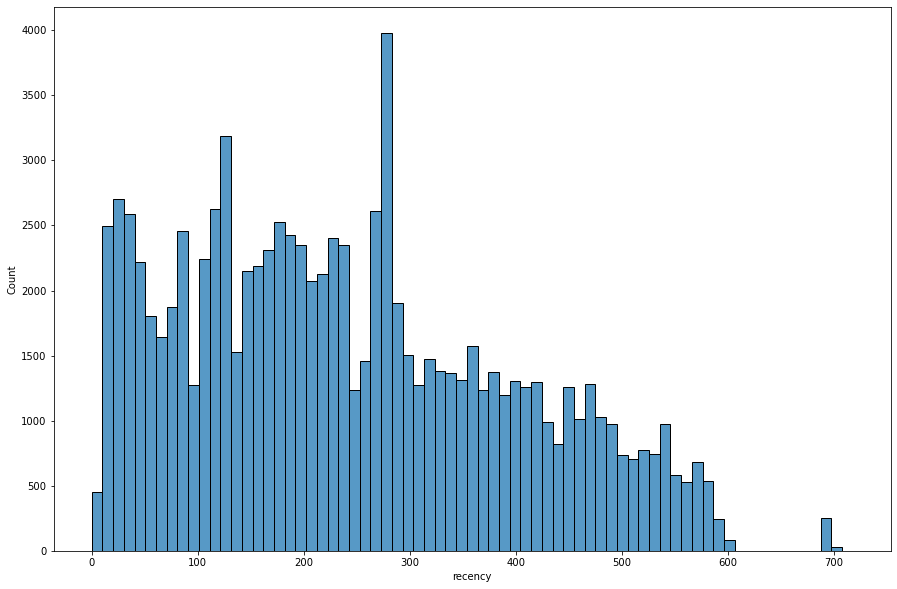

In [59]:
plt.figure(figsize=(15,10))
sns.histplot(RFM.recency)

In [60]:
RFM.recency.quantile([0.2, 0.4, 0.6, 0.8])

0.2     97.0
0.4    181.0
0.6    272.0
0.8    387.0
Name: recency, dtype: float64

стандартное разбиение по 20-ти % квантилям результата не даст, 
судя по распределению на графике recency можно разделить на три группы 33 и 66 квантилями: до 33, между 33 и 66, после 66

In [61]:
quantile_r = RFM.recency.quantile([0.33, 0.66])
quantile_r

0.33    152.0
0.66    291.0
Name: recency, dtype: float64

In [62]:
def r_score(x):
    if x <= quantile_r[0.33]:
        return 3
    elif x <= quantile_r[0.66]:
        return 2
    else:
        return 1

frequency

<AxesSubplot:xlabel='frequency', ylabel='Count'>

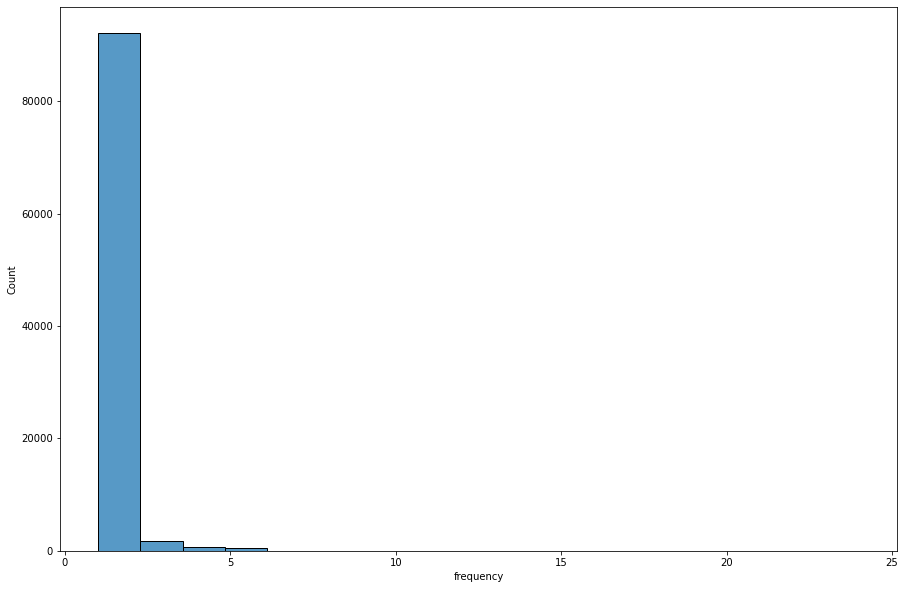

In [63]:
plt.figure(figsize=(15,10))
sns.histplot(RFM.frequency)

In [64]:
RFM.frequency.value_counts()

1     83168
2      8948
3      1667
4       629
5       246
6       195
7        46
8        16
11       11
9        11
10       11
12        9
14        3
15        2
13        2
20        2
16        1
18        1
21        1
24        1
Name: frequency, dtype: int64

In [65]:
'{} % покупателей совершили 1 покупку'.format(round(RFM.frequency.value_counts()[1] / RFM.frequency.value_counts().sum() * 100, 1))

'87.6 % покупателей совершили 1 покупку'

In [66]:
'{} % покупателей совершили 2 покупки'.format(round((RFM.frequency.value_counts()[2]) / RFM.frequency.value_counts().sum() * 100, 1))

'9.4 % покупателей совершили 2 покупки'

In [67]:
'{} % покупателей совершили больше 2-х покупок'.format(round(RFM.frequency.value_counts()[2::].sum() / RFM.frequency.value_counts().sum() * 100, 1))

'3.0 % покупателей совершили больше 2-х покупок'

делим на группы: 1 покупка, 2 покупки, больше 2-х покупок

In [68]:
def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3

monetary

<AxesSubplot:xlabel='monetary', ylabel='Count'>

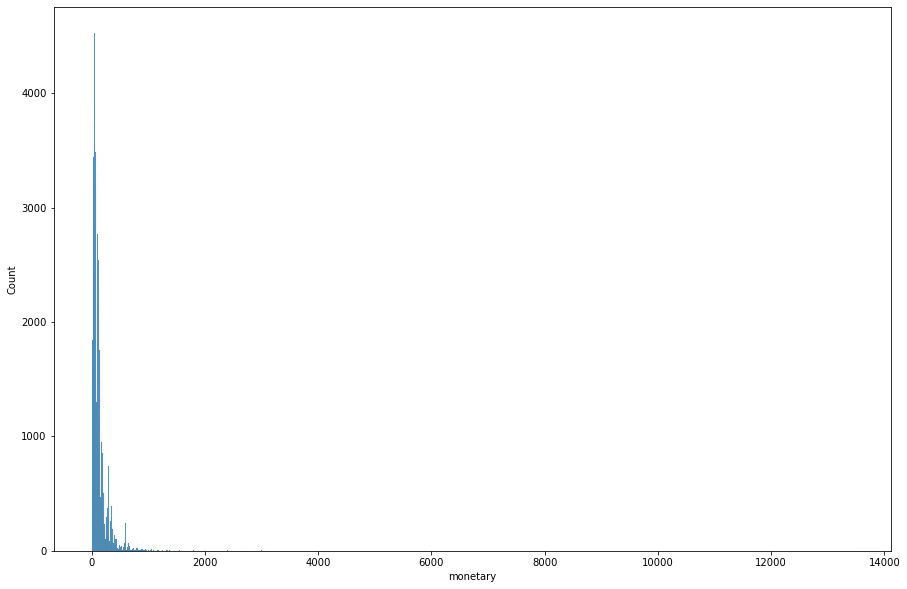

In [69]:
plt.figure(figsize=(15,10))
sns.histplot(RFM.monetary)

<AxesSubplot:xlabel='monetary', ylabel='Count'>

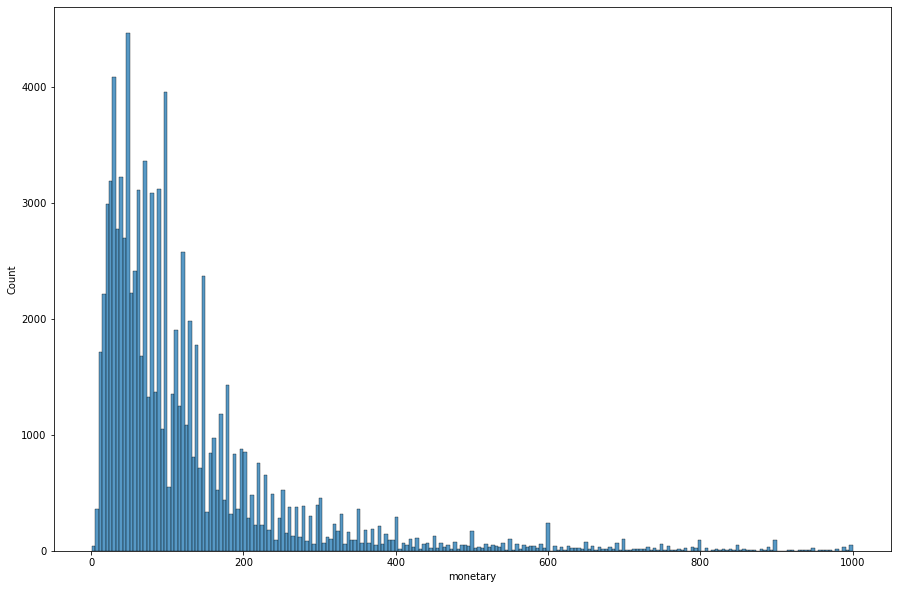

In [70]:
# посмотрим поближе 
plt.figure(figsize=(15,10))
sns.histplot(RFM.query('monetary < 1000').monetary)

In [71]:
quantile_m = RFM.monetary.quantile([0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.99])
quantile_m

0.20      39.900
0.40      69.900
0.60     109.900
0.80     179.900
0.90     281.249
0.95     420.000
0.99    1004.990
Name: monetary, dtype: float64

In [72]:
RFM[RFM.monetary > RFM.monetary.quantile(0.99)].monetary.sum() / RFM.monetary.sum()

0.11442171632644157

In [73]:
RFM[RFM.monetary < RFM.monetary.quantile(0.95)].monetary.sum() / RFM.monetary.sum()

0.70811381836624

разделим на группы: до 95-го квантиля, от 95-го до 99-го, после 99-го

In [74]:
def m_score(x):
    if x <= quantile_m[0.95]:
        return 1
    elif x <= quantile_m[0.99]:
        return 2
    else:
        return 3

In [75]:
# собираем метрики в RFM
RFM['R'] = RFM.recency.apply(r_score)
RFM['F'] = RFM.frequency.apply(f_score)
RFM['M'] = RFM.monetary.apply(m_score)
RFM['RFM_Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,3,1,1,311
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,1,1,111
...,...,...,...,...,...,...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,451,2,1570.00,1,2,3,123
94966,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,2,1,1,211
94967,ffff371b4d645b6ecea244b27531430a,573,1,89.90,1,1,1,111
94968,ffff5962728ec6157033ef9805bacc48,124,1,115.00,3,1,1,311


In [76]:
print(RFM.recency.quantile(0.33))
print(RFM.recency.quantile(0.66))
print(RFM.recency.max())
print(RFM.recency.min())

152.0
291.0
718
0


границы метрик:
    
recency:
1 — от 1870 до 2297 дней      
2 — от 1731 до 1870 дней      
3 — от 1579 до 1731 дней  

frequency:  
1 — 1 покупка  
2 — 2 покупки  
3 — 3 и более покупок  

monetary:  
1 — от 0.85 до 420  
2 — от 420 до 1004.99   
3 — от 1004.99   

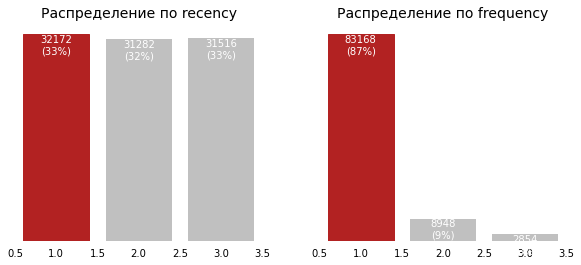

In [77]:
# визуализация пользователей по recency и frequency
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'recency', 'F':'frequency'}
    y = RFM[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Распределение по {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

время от последней покупки пользователя до текущей даты (recency) распределено равномерно

суммарное количество покупок (frequency) преобладает 1 покупка

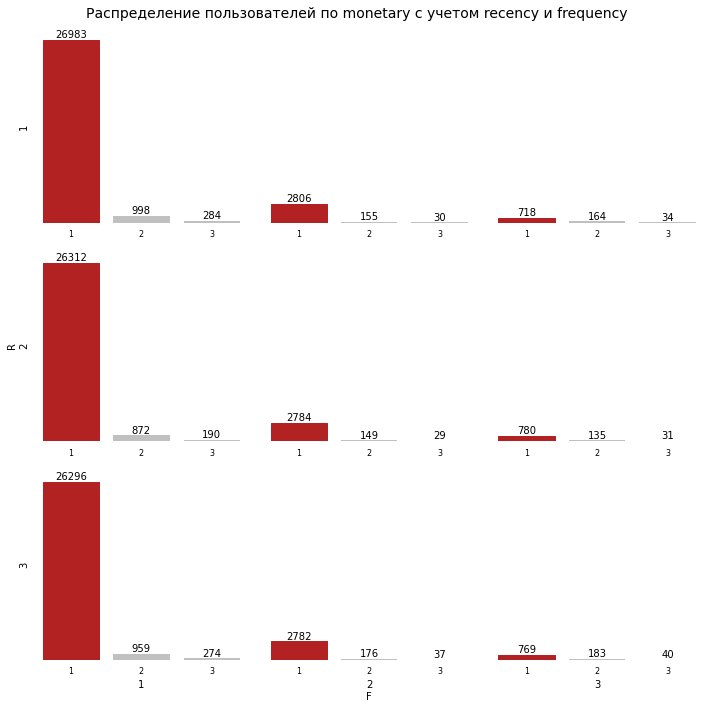

In [78]:
# визуализация пользователей по monetary с учетом recency и frequency
fig, axes = plt.subplots(nrows=3, ncols=3,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 4)
f_range = range(1, 4)
for r in r_range:
    for f in f_range:
        y = RFM[(RFM['R'] == r) & (RFM['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 3:
            if f == 2:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 2:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Распределение пользователей по monetary с учетом recency и frequency',
             fontsize=14)
plt.tight_layout()
plt.show()

большинство пользователей совершили 1 покупку (F = 1) и потратили меньше 420 денег (M = 1) вне зависимости от времени.

посмотрим, какие кластеры приносят больше прибыли

In [79]:
RFM_cluster = RFM \
    .groupby('RFM_Score', as_index=False) \
    .agg({'customer_unique_id': 'count', 'monetary': 'sum'}) \
    .rename(columns={'customer_unique_id': 'quantity_customers'}) \
    .sort_values('monetary', ascending=False) 
RFM_cluster

,RFM_Score,quantity_customers,monetary
0,111,26983,2682713.28
9,211,26312,2623899.70
18,311,26296,2618062.64
1,112,998,644777.04
19,312,959,608369.76
10,212,872,546900.71
2,113,284,458640.22
20,313,274,453126.75
12,221,2784,416649.64
21,321,2782,410448.00


In [80]:
RFM_cluster = RFM_cluster.assign(monetary_perc = RFM_cluster.monetary / RFM_cluster.monetary.sum() * 100) 
RFM_cluster

,RFM_Score,quantity_customers,monetary,monetary_perc
0,111,26983,2682713.28,19.882657
9,211,26312,2623899.70,19.446766
18,311,26296,2618062.64,19.403505
1,112,998,644777.04,4.778700
19,312,959,608369.76,4.508871
10,212,872,546900.71,4.053299
2,113,284,458640.22,3.399165
20,313,274,453126.75,3.358303
12,221,2784,416649.64,3.087956
21,321,2782,410448.00,3.041994


больше всего совершили покупок пользователи с кластерали RFM 111, 211, 311, 
111 - совершили одну покупку на небольшую сумму, но давно 
211 - совершили одну покупку на небольшую сумму, но не так давно
311 - совершили одну покупку на небольшую сумму, но недавно

для увеличения прибыли логично работать с ними:
    - напомнить, что пора еще что-нибудь купить 
    - дать скидку на второй товар или преложить что-то похожее (данные кластеры с двумя покупками занимают 4, 5 и 6 места)
    